In [1]:
import glob

In [2]:
folder = "/mnt/t3nfs01/data01/shome/creissel/tth/2017/gc/meanalysis/GC177d50c38c99/Delphes_ttH"

In [9]:
! ls $folder | head -n 10

Delphes_010618.root
job_0_out.root
job_0_training.csv
job_100_out.root
job_100_training.csv
job_101_out.root
job_101_training.csv
job_102_out.root
job_102_training.csv
job_103_out.root
ls: write error: Broken pipe


In [10]:
! head -n 1 $folder/job_0_training.csv

num_leptons leptons_pt_0 leptons_pt_1 leptons_eta_0 leptons_eta_1 leptons_phi_0 leptons_phi_1 leptons_mass_0 leptons_mass_1 num_jets jets_pt_0 jets_pt_1 jets_pt_2 jets_pt_3 jets_pt_4 jets_pt_5 jets_pt_6 jets_pt_7 jets_pt_8 jets_pt_9 jets_eta_0 jets_eta_1 jets_eta_2 jets_eta_3 jets_eta_4 jets_eta_5 jets_eta_6 jets_eta_7 jets_eta_8 jets_eta_9 jets_phi_0 jets_phi_1 jets_phi_2 jets_phi_3 jets_phi_4 jets_phi_5 jets_phi_6 jets_phi_7 jets_phi_8 jets_phi_9 jets_mass_0 jets_mass_1 jets_mass_2 jets_mass_3 jets_mass_4 jets_mass_5 jets_mass_6 jets_mass_7 jets_mass_8 jets_mass_9 jets_btag_0 jets_btag_1 jets_btag_2 jets_btag_3 jets_btag_4 jets_btag_5 jets_btag_6 jets_btag_7 jets_btag_8 jets_btag_9 met_eta met_phi met_sumEt nBtags mbb_closest ht30 top_pt top_eta top_phi top_mass atop_pt atop_eta atop_phi atop_mass bottom_pt bottom_eta bottom_phi bottom_mass abottom_pt abottom_eta abottom_phi abottom_mass prob_ttH prob_ttbb JLR


In [7]:
files = glob.glob(folder+'/*.csv')
df = pd.concat([pd.read_csv(x,sep=" ",index_col=False) for x in files])

In [8]:
df.columns.tolist()

['num_leptons',
 'leptons_pt_0',
 'leptons_pt_1',
 'leptons_eta_0',
 'leptons_eta_1',
 'leptons_phi_0',
 'leptons_phi_1',
 'leptons_mass_0',
 'leptons_mass_1',
 'num_jets',
 'jets_pt_0',
 'jets_pt_1',
 'jets_pt_2',
 'jets_pt_3',
 'jets_pt_4',
 'jets_pt_5',
 'jets_pt_6',
 'jets_pt_7',
 'jets_pt_8',
 'jets_pt_9',
 'jets_eta_0',
 'jets_eta_1',
 'jets_eta_2',
 'jets_eta_3',
 'jets_eta_4',
 'jets_eta_5',
 'jets_eta_6',
 'jets_eta_7',
 'jets_eta_8',
 'jets_eta_9',
 'jets_phi_0',
 'jets_phi_1',
 'jets_phi_2',
 'jets_phi_3',
 'jets_phi_4',
 'jets_phi_5',
 'jets_phi_6',
 'jets_phi_7',
 'jets_phi_8',
 'jets_phi_9',
 'jets_mass_0',
 'jets_mass_1',
 'jets_mass_2',
 'jets_mass_3',
 'jets_mass_4',
 'jets_mass_5',
 'jets_mass_6',
 'jets_mass_7',
 'jets_mass_8',
 'jets_mass_9',
 'jets_btag_0',
 'jets_btag_1',
 'jets_btag_2',
 'jets_btag_3',
 'jets_btag_4',
 'jets_btag_5',
 'jets_btag_6',
 'jets_btag_7',
 'jets_btag_8',
 'jets_btag_9',
 'met_eta',
 'met_phi',
 'met_sumEt',
 'nBtags',
 'mbb_closest',
 '

In [122]:
def make_p4(df,collection,iob):
    iob = "" if iob is None else "_%d" % iob
    pt   =  df['%s_pt%s'  % (collection,iob)]
    eta  = df['%s_eta%s' % (collection,iob)]
    phi  = df['%s_phi%s' % (collection,iob)]
    mass = df['%s_mass%s' % (collection,iob)]
    df["%s_px%s" % (collection,iob)] = pt * np.cos(phi)
    df["%s_py%s" % (collection,iob)] = pt * np.sin(phi)
    df["%s_pz%s" % (collection,iob)] = pt * np.sinh(eta)
    df["%s_en%s" % (collection,iob)] = np.sqrt(mass**2 + (1+np.sinh(eta)**2)*pt**2)
    
    
def make_m2(df,coll1,iob1,coll2,iob2):
    
    im = ""
    if iob1 is not None:
        iob1 = "_%d" % iob1
        im += iob1
    else:
        iob1 = ""
    if iob2 is not None:
        if im.startswith("_"):
            im += "%d" % iob2
        else:
            im += "_%d" % iob2
        iob2 = "_%d" % iob2
    else:
        iob2 = ""    
    
    px = df[ "%s_px%s" % (coll1,iob1) ] + df[ "%s_px%s" % (coll2,iob2) ]
    py = df[ "%s_py%s" % (coll1,iob1) ] + df[ "%s_py%s" % (coll2,iob2) ]
    pz = df[ "%s_pz%s" % (coll1,iob1) ] + df[ "%s_pz%s" % (coll2,iob2) ]
    en = df[ "%s_en%s" % (coll1,iob1) ] + df[ "%s_en%s" % (coll2,iob2) ]
    
    df["%s_%s_m2%s" %(coll1,coll2,im)] = en*en - px*px - py*py - pz*pz

    

In [123]:
for ilep in range(2):
    make_p4(df,'leptons',ilep)
    
for ijet in range(10):
    make_p4(df,'jets',ijet)

In [124]:
for parton in ["top","atop","bottom","abottom"]:
    make_p4(df,parton,None)
    
make_m2(df,"top",None,"atop",None)
make_m2(df,"top",None,"bottom",None)
make_m2(df,"top",None,"abottom",None)
make_m2(df,"atop",None,"bottom",None)
make_m2(df,"atop",None,"abottom",None)
make_m2(df,"bottom",None,"abottom",None)



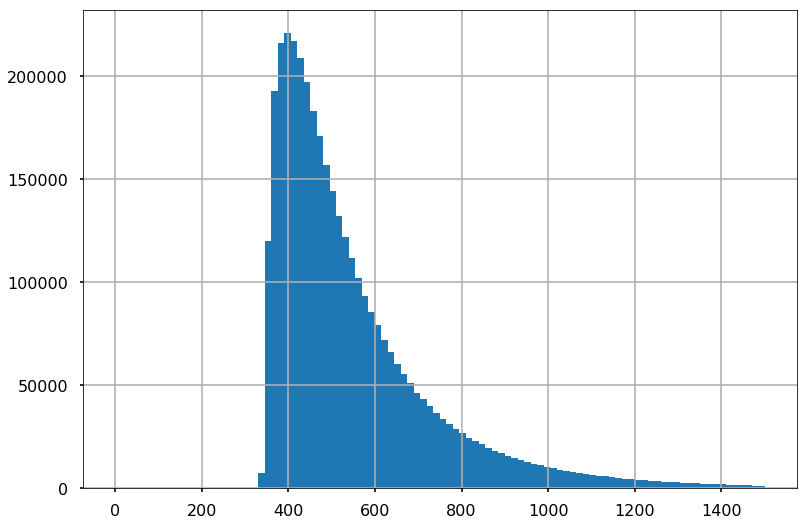

In [125]:
np.sqrt(df.top_atop_m2).hist(bins=100,range=[0,1500])

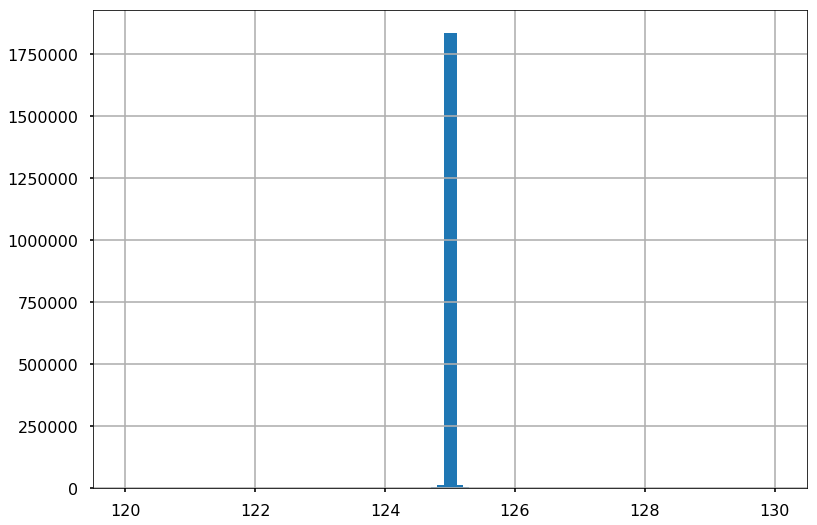

In [130]:
np.sqrt(df.bottom_abottom_m2).hist(bins=100,range=[120,130])

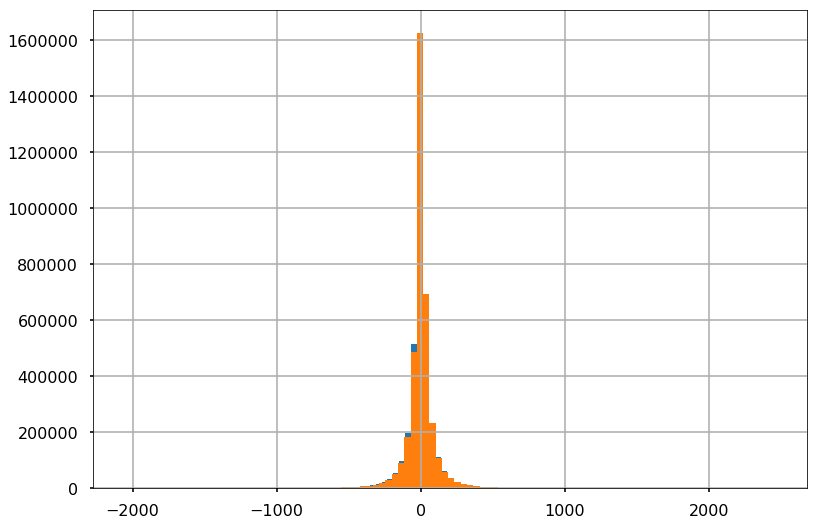

In [126]:
(df["top_px"] + df["atop_px"] + df["bottom_px"] +  df["abottom_px"] ).hist(bins=100) 
(df["top_py"] + df["atop_py"] + df["bottom_py"] +  df["abottom_py"] ).hist(bins=100) 


In [127]:
df.columns

Index([u'num_leptons', u'leptons_pt_0', u'leptons_pt_1', u'leptons_eta_0',
       u'leptons_eta_1', u'leptons_phi_0', u'leptons_phi_1', u'leptons_mass_0',
       u'leptons_mass_1', u'num_jets',
       ...
       u'abottom_px', u'abottom_py', u'abottom_pz', u'abottom_en',
       u'top_atop_m2', u'top_bottom_m2', u'top_abottom_m2', u'atop_bottom_m2',
       u'atop_abottom_m2', u'bottom_abottom_m2'],
      dtype='object', length=155)

In [128]:
df.to_hdf('/scratch/musella/delphes_tth.hd5',key='delphes',format='t',mode='w')

In [45]:
import matplotlib as mpl
mpl.style.use('seaborn-poster')

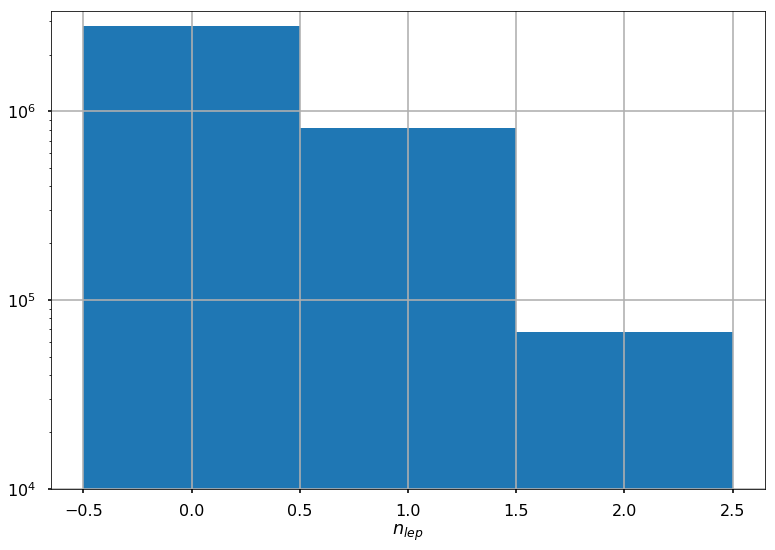

In [46]:
df.num_leptons.hist(bins=3,range=[-0.5,2.5])
plt.yscale('log')
plt.ylim([1e+4,None])
plt.xlabel('$n_{lep}$')

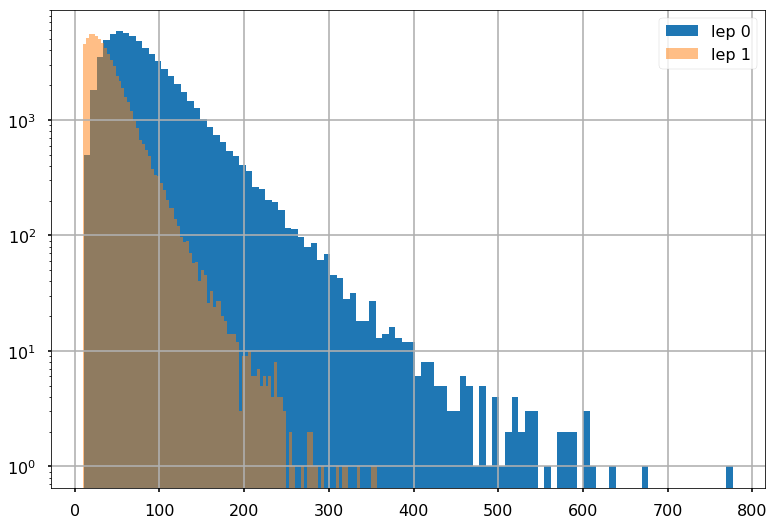

In [47]:
df[df.num_leptons==2].leptons_pt_0.hist(bins=100,label='lep 0')
df[df.num_leptons==2].leptons_pt_1.hist(bins=100,alpha=0.5,label='lep 1')

plt.yscale('log')
plt.legend()

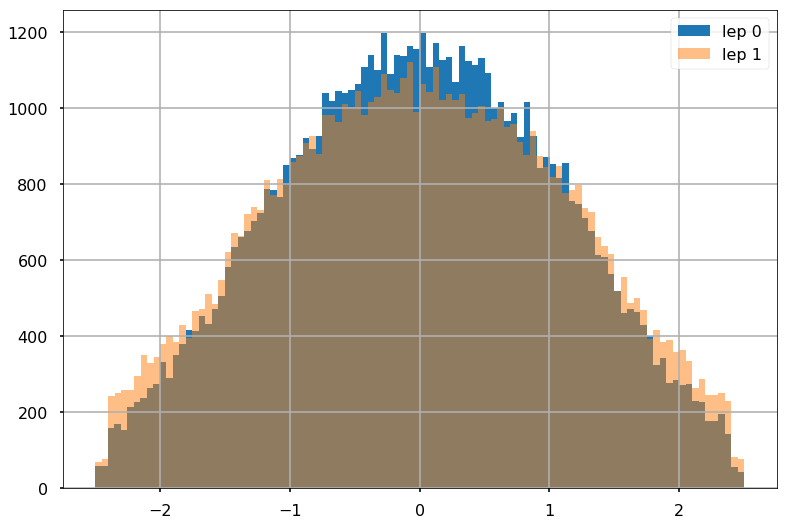

In [51]:
df[df.num_leptons==2].leptons_eta_0.hist(bins=100,label='lep 0')
df[df.num_leptons==2].leptons_eta_1.hist(bins=100,alpha=0.5,label='lep 1')

# plt.yscale('log')
plt.legend()

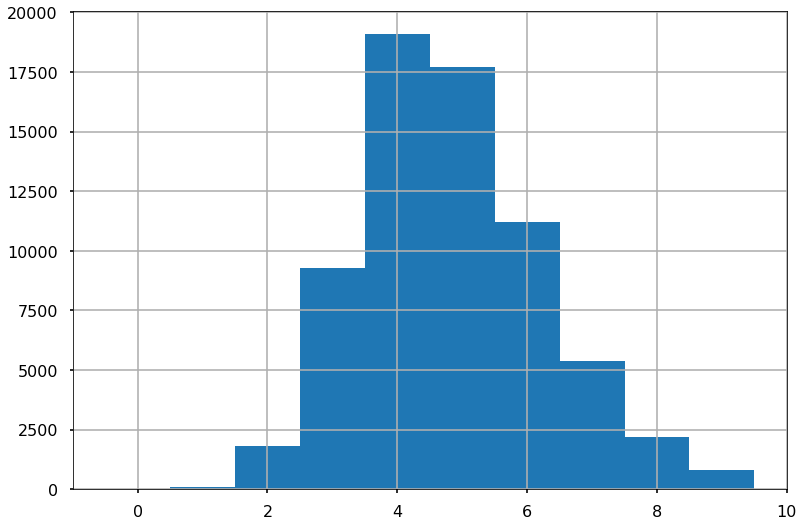

In [57]:
df[(df.num_leptons==2)].num_jets.hist(bins=10,range=[-0.5,9.5])

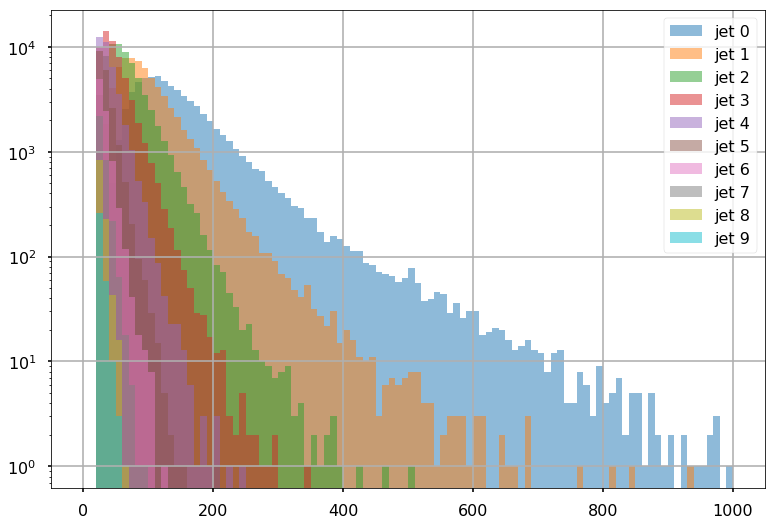

In [59]:
for ijet in range(10):
    df[(df.num_leptons==2)&(df.num_jets>ijet)]["jets_pt_%d"%ijet].hist(bins=100,range=[0,1000],label='jet %d'%ijet,alpha=0.5)

# df[(df.num_leptons==2)&(df.num_jets>0)].jets_pt_0.hist(bins=100,range=[0,1000],label='jet 0')
# df[(df.num_leptons==2)&(df.num_jets>1)].jets_pt_1.hist(bins=100,range=[0,1000],alpha=0.5,label='jet 1')
# df[(df.num_leptons==2)&(df.num_jets>2)].jets_pt_2.hist(bins=100,range=[0,1000],alpha=0.5,label='jet 2')
# df[(df.num_leptons==2)&(df.num_jets>3)].jets_pt_3.hist(bins=100,range=[0,1000],alpha=0.5,label='jet 3')

plt.yscale('log')
plt.legend()

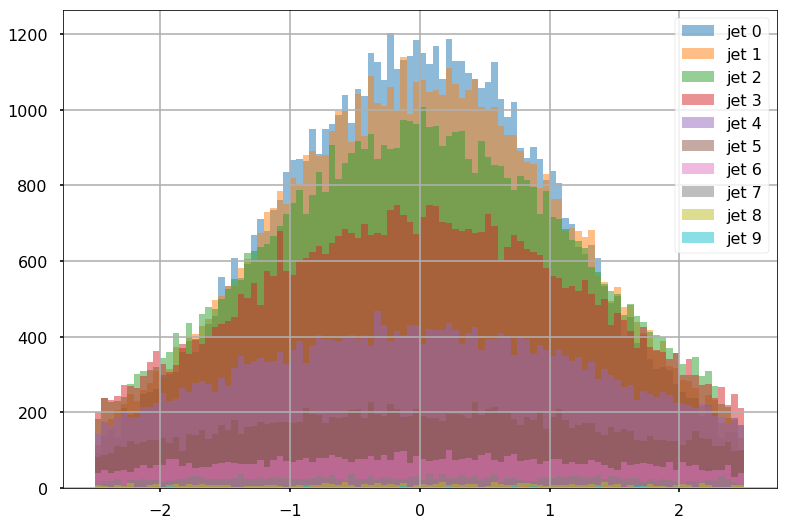

In [60]:
for ijet in range(10):
    df[(df.num_leptons==2)&(df.num_jets>ijet)]["jets_eta_%d"%ijet].hist(bins=100,range=[-2.5,2.5],label='jet %d'%ijet,alpha=0.5)

# df[(df.num_leptons==2)&(df.num_jets>0)].jets_eta_0.hist(bins=100,range=[-2.5,2.5],label='jet 0')
# df[(df.num_leptons==2)&(df.num_jets>1)].jets_eta_1.hist(bins=100,range=[-2.5,2.5],alpha=0.5,label='jet 1')
# df[(df.num_leptons==2)&(df.num_jets>2)].jets_eta_2.hist(bins=100,range=[-2.5,2.5],alpha=0.5,label='jet 2')
# df[(df.num_leptons==2)&(df.num_jets>3)].jets_eta_3.hist(bins=100,range=[-2.5,2.5],alpha=0.5,label='jet 3')

# plt.yscale('log')
plt.legend()

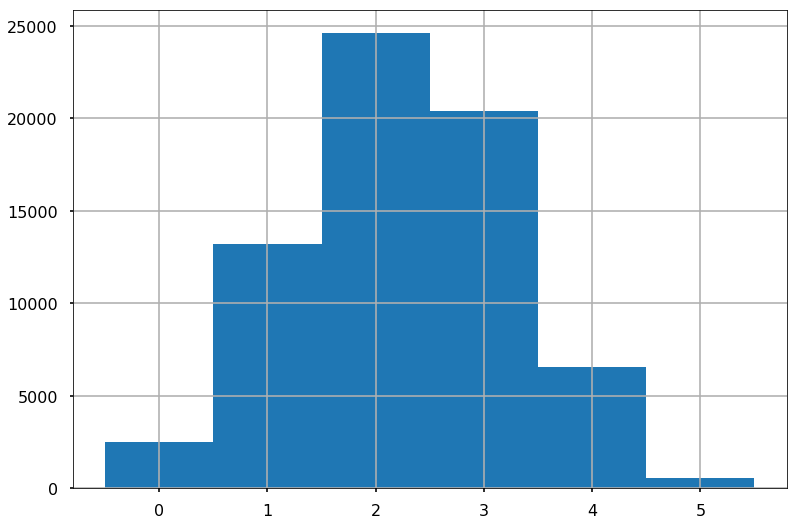

In [95]:
# df[(df.num_leptons==2)].groupby("num_jets")

df[(df.num_leptons==2)&(df.num_jets>1)][['jets_btag_%d' % ij for ij in range(10)]].sum(axis=1).hist(bins=6,range=[-0.5,5.5])

In [81]:
fracs = [ df[(df.num_leptons==2)&(df.num_jets>ijet)]["jets_btag_%d"%ijet].mean() for ijet in range(10) ]
    
fracs

[0.595178132225806,
 0.5776640311541185,
 0.498848519741826,
 0.39660885504794136,
 0.2903620222210409,
 0.22154124384607657,
 0.17128087306145892,
 0.15120481927710844,
 0.128686327077748,
 0.09696969696969697]

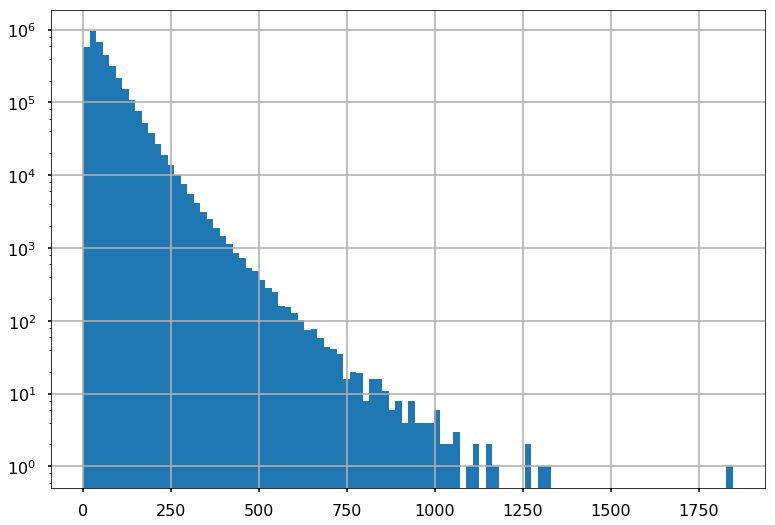

In [72]:
df.met_sumEt.hist(bins=100)
plt.yscale('log')